In [4]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_intrusion
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [5]:
data, bb = load_intrusion()
output='intrusion'
if not os.path.exists(output):
    os.mkdir(output)

In [ ]:
rotation = [-73.24819946289062, -86.82220458984375, -13.912878036499023]

In [4]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   500,
                                   nelements=10000,
                                   steps=4,
                                   interpolatortype='FDI')

### Data and fault surface


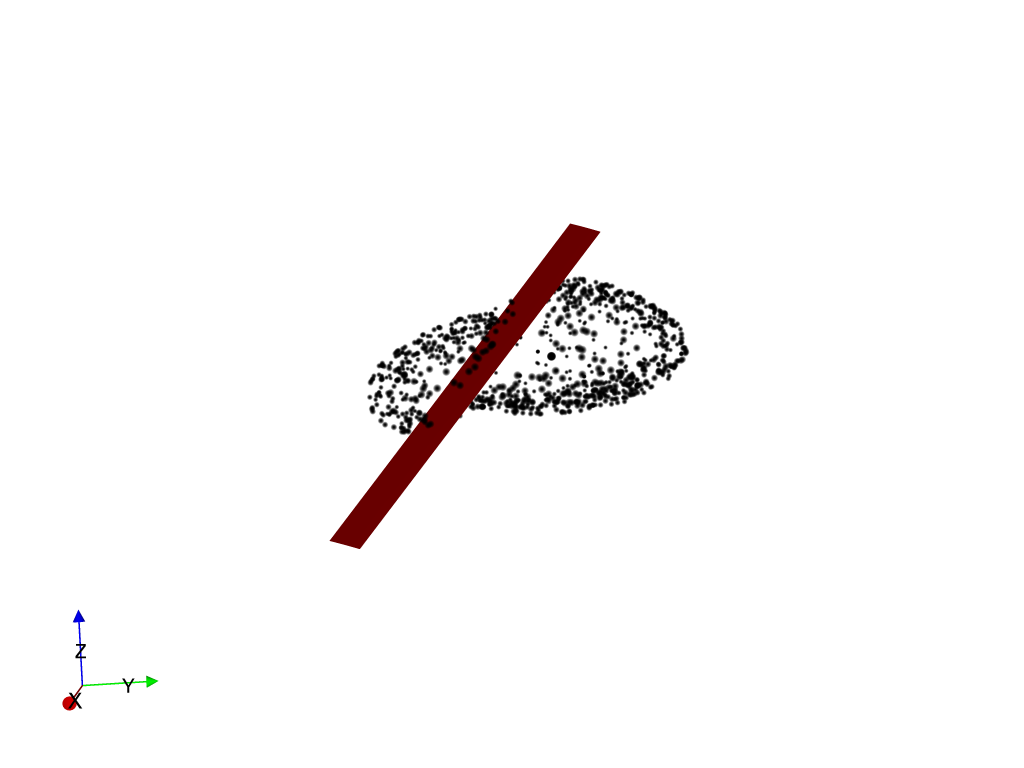

In [46]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault['feature'],
                     voxet=model.voxet(),
                      isovalue=0
#                       slices=[0,1]#nslices=10
                     )
xyz = model.data[model.data['type']=='strati'][['X','Y','Z']].to_numpy()
xyz = xyz[fault['feature'].evaluate(xyz),:]
# viewer.add_vector_field(fault['feature'], locations=xyz)
viewer.add_points(model.data[model.data['type']=='strati'][['X','Y','Z']],name='prefault',pointsize=6)
# viewer.interactive()
viewer.lv.rotate(rotation)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('0.png')

# viewer.add_points(,name='prefault',pointsize=6)
viewer.lv.display()

### fault surface and displacement vectors


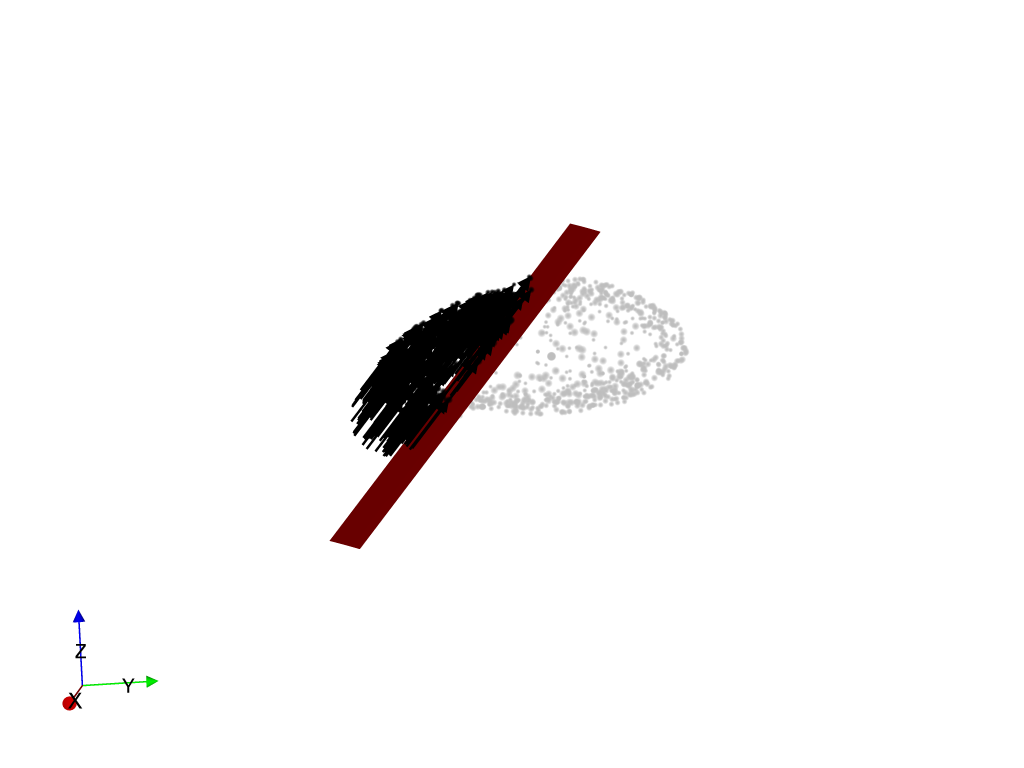

'1.png'

In [48]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault['feature'],
                     voxet=model.voxet(),
                      isovalue=0
#                       slices=[0,1]#nslices=10
                     )
xyz = model.data[model.data['type']=='strati'][['X','Y','Z']].to_numpy()
xyz = xyz[fault['feature'].evaluate(xyz),:]
viewer.add_vector_field(fault['feature'], locations=xyz)
xyz = model.data[model.data['type']=='strati'][['X','Y','Z']].to_numpy()
xyz = fault['feature'].apply_to_points(xyz)
viewer.add_points(xyz[fault['feature'].evaluate(xyz)],name='faulted',pointsize=6)
viewer.add_points(xyz[~fault['feature'].evaluate(xyz)],name='nfaulted',pointsize=6,colour='grey')

# viewer.add_points(model.data[model.data['type']=='strati'][['X','Y','Z']],name='prefault')
viewer.lv.rotate(rotation)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
# viewer.add_points(,name='prefault',pointsize=6)
viewer.lv.display()
viewer.lv.image('1.png')
# viewer.interactive()

### Faulted points


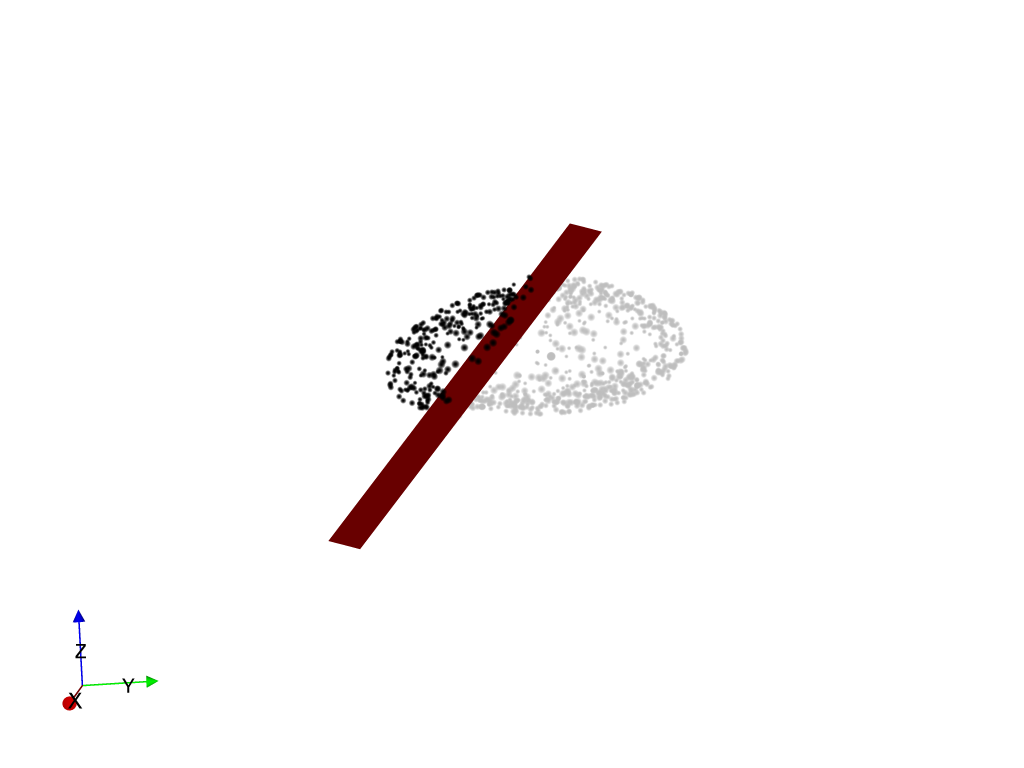

In [38]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   500,
                                   nelements=2000,
                                   steps=4,
                                   interpolatortype='PLI')
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault['feature'],
                     voxet=model.voxet(),
                      isovalue=0
#                       slices=[0,1]#nslices=10
                     )
xyz = model.data[model.data['type']=='strati'][['X','Y','Z']].to_numpy()
xyz = fault['feature'].apply_to_points(xyz)
viewer.add_points(xyz[fault['feature'].evaluate(xyz)],name='faulted',pointsize=6)
viewer.add_points(xyz[~fault['feature'].evaluate(xyz)],name='nfaulted',pointsize=6,colour='grey')
viewer.lv.rotate(rotation)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
# viewer.add_points(,name='prefault',pointsize=6)
viewer.lv.image('2.png')

viewer.lv.display()
# viewer.interactive()

### Interpolated surface with fault

In [51]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
fault = model.create_and_add_fault('fault',
                                   500,
                                   nelements=2000,
                                   steps=4,
                                   interpolatortype='PLI')
strati = model.create_and_add_foliation('strati',nelements=30000,interpolatortype='PLI',cgw=0.03)


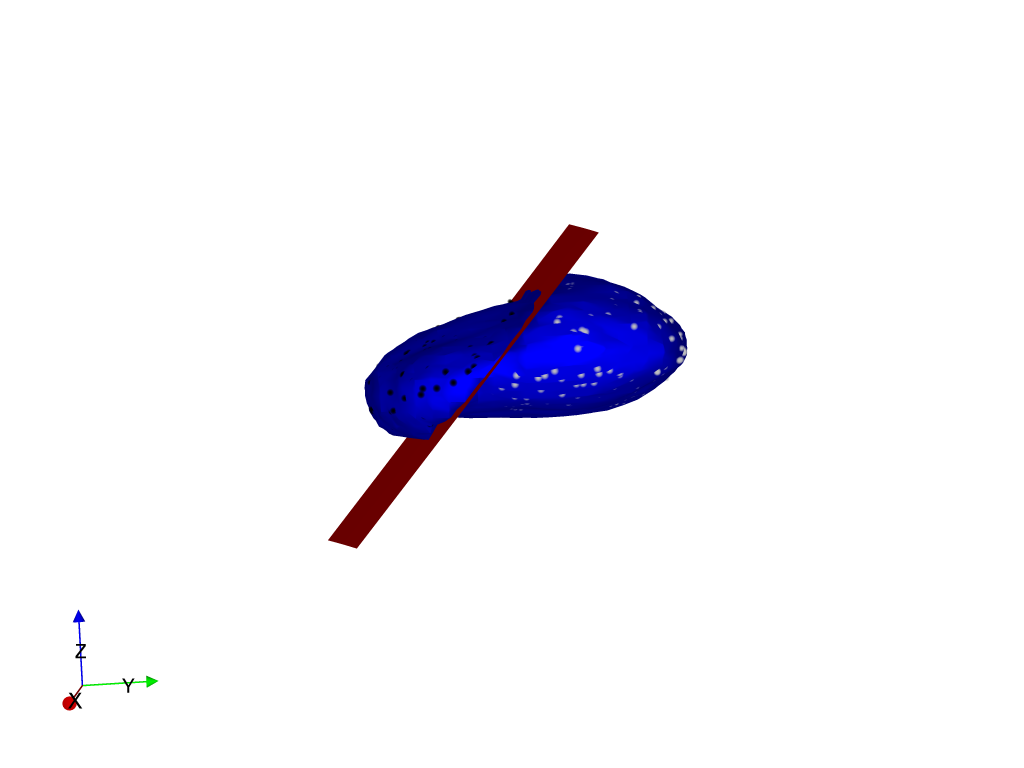

In [52]:
viewer = LavaVuModelViewer(model)
# strati['feature'].faults = []
viewer.add_isosurface(strati['feature'],
                     voxet=model.voxet(),
                     isovalue=0,
                     colour='blue')
# viewer.add_data(model.features[0][0])
# viewer.add_data(strati['feature'])
viewer.add_isosurface(fault['feature'],
                     voxet=model.voxet(),
                      isovalue=0
#                       slices=[0,1]#nslices=10
                     )
xyz = model.data[model.data['type']=='strati'][['X','Y','Z']].to_numpy()
viewer.add_points(xyz[fault['feature'].evaluate(xyz)],name='faulted',pointsize=6)
viewer.add_points(xyz[~fault['feature'].evaluate(xyz)],name='nfaulted',pointsize=6,colour='grey')
viewer.lv.rotate(rotation)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('3.png')

# viewer.add_points(,name='prefault',pointsize=6)
viewer.lv.display()

In [53]:
# rotation


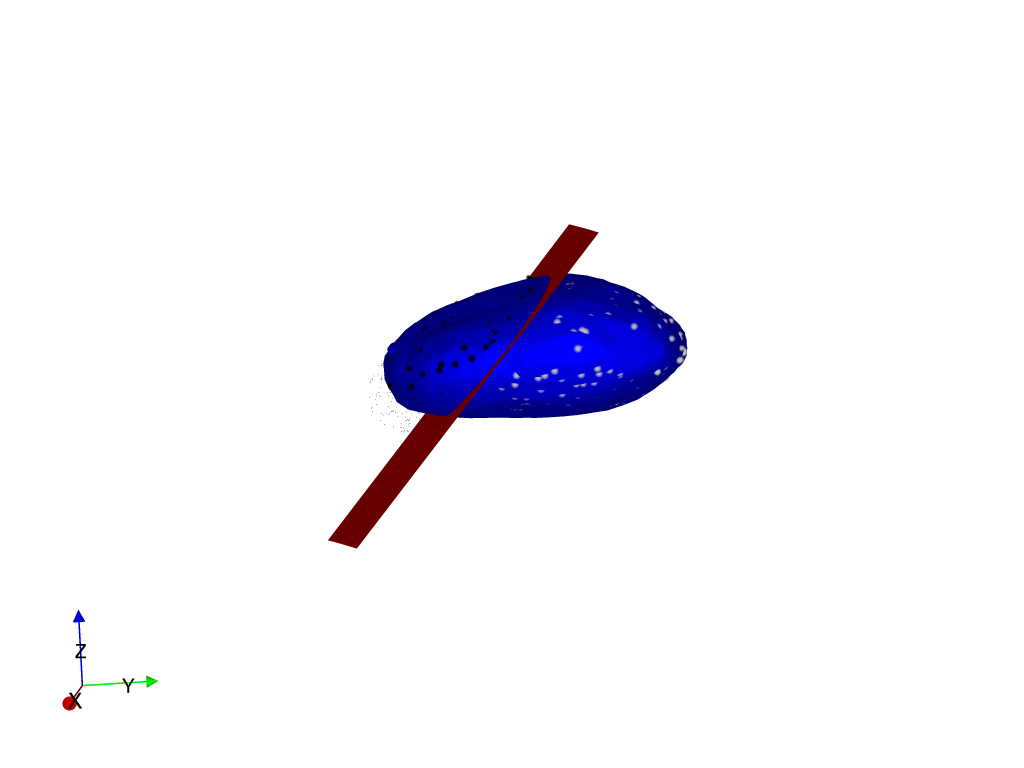

'4.png'

In [55]:
viewer = LavaVuModelViewer(model)
strati['feature'].faults = []
viewer.add_isosurface(strati['feature'],
                     voxet=model.voxet(),
                     isovalue=0,
                     colour='blue')
# viewer.add_data(model.features[0][0])
# viewer.add_data(strati['feature'])
xyz = model.data[model.data['type']=='strati'][['X','Y','Z']].to_numpy()
xyz = fault['feature'].apply_to_points(xyz)
viewer.add_points(xyz[fault['feature'].evaluate(xyz)],name='faulted',pointsize=6)
viewer.add_points(xyz[~fault['feature'].evaluate(xyz)],name='nfaulted',pointsize=6,colour='grey')

viewer.add_isosurface(fault['feature'],
                     voxet=model.voxet(),
                      isovalue=0
#                       slices=[0,1]#nslices=10
                     )
viewer.add_points(model.data[model.data['type']=='strati'][['X','Y','Z']],name='prefault')
# viewer.interactive()
viewer.lv.rotate(rotation)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
# viewer.add_points(,name='prefault',pointsize=6)
viewer.lv.display()
viewer.lv.image('4.png')

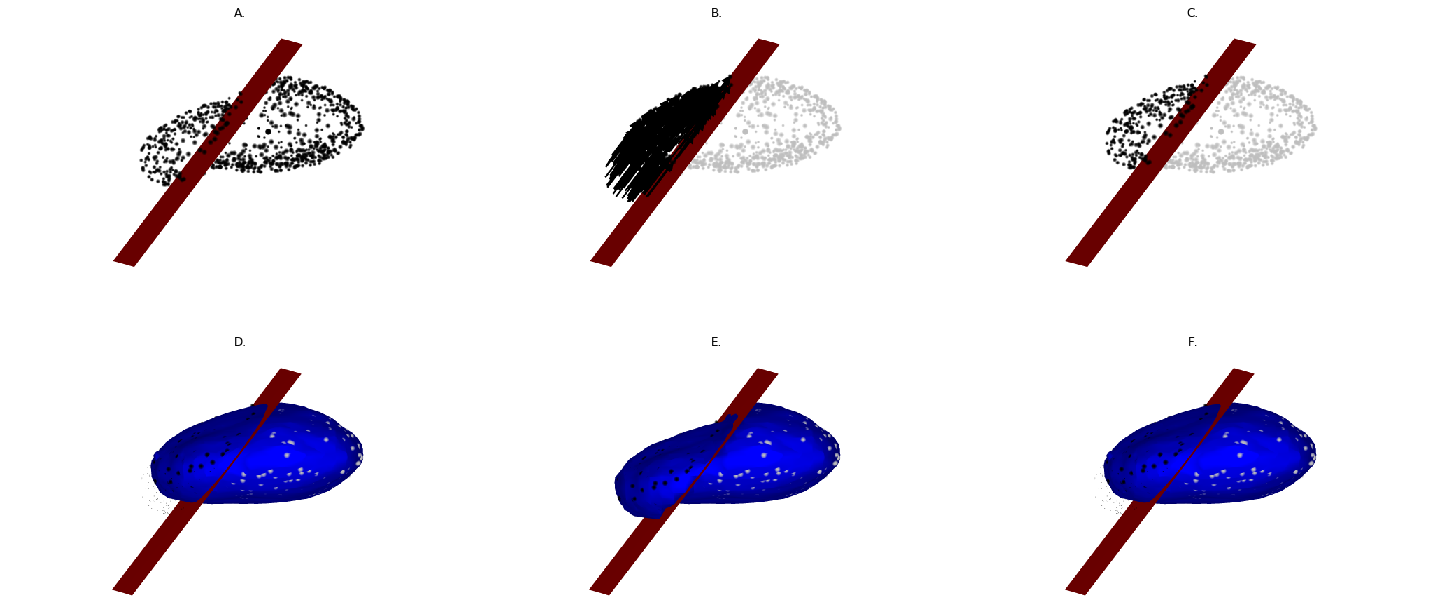

In [56]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].imshow(plt.imread('0.png')[200:565, 178:844,:])
ax[0,0].set_title('A.')
ax[0,1].imshow(plt.imread('1.png')[200:565, 178:844,:])
ax[0,1].set_title('B.')
ax[0,2].imshow(plt.imread('2.png')[200:565, 178:844,:])
ax[0,2].set_title('C.')
ax[1,0].imshow(plt.imread('4.png')[200:565, 178:844,:])
ax[1,0].set_title('D.')
ax[1,1].imshow(plt.imread('3.png')[200:565, 178:844,:])
ax[1,1].set_title('E.')
ax[1,2].imshow(plt.imread('4.png')[200:565, 178:844,:])
ax[1,2].set_title('F.')

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')
plt.tight_layout()
# plt.